In [1]:
import numpy as np
from tqdm import tqdm
import os

io_path = '/dk/lcj_rag/pyserini-autofusion/experiments/runs'

depth=1000
#  alpha*bf + (1-alpha)*bm25
nq = -1
k=100

train_bf_trec_path = f'{io_path}/base_trec/run.dpr.wq-train.multi.bf.trec'
train_bm25_trec_path = f'{io_path}/base_trec/run.dpr.wq-train.bm25.trec'
cache_path = '/dk/lcj_rag/pyserini-autofusion/experiments/cache/'
fusion_tag = 'fusion'

train_embedding_path = '/dk/rag-dataset/queries/query-embedding-dpr_multi-wq-train-20240508-9323ec.feaa4458c033613812bb9b84ff015669/embedding.pkl'
filename = f'{io_path}/wq_train/run.dpr.wq-train.{fusion_tag}.all-alpha.k-{k}.res'



In [9]:
filename += '.critical_info'
print(filename)

/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_train/run.dpr.wq-train.fusion.all-alpha.k-100.res.critical_info


In [16]:
out_json_path = f'{io_path}/wq_train/run.dpr.wq-train.{fusion_tag}.alpha-?.k-{k}.json'

cmd2 = f'python -m pyserini.eval.evaluate_dpr_retrieval_all_alpha \
    --retrieval {out_json_path} \
    --topk 100'
res = os.system(cmd2 + f'1> {filename}')
print(filename)

  0%|          | 0/21 [00:00<?, ?it/s]
0it [00:00, ?it/s]
1773it [00:00, 17725.62it/s]
3778it [00:00, 18431.25it/s]
  5%|▍         | 1/21 [00:01<00:23,  1.17s/it]
0it [00:00, ?it/s]
1639it [00:00, 16383.69it/s]
3778it [00:00, 17247.32it/s]
 10%|▉         | 2/21 [00:02<00:22,  1.19s/it]
0it [00:00, ?it/s]
1632it [00:00, 16306.99it/s]
3778it [00:00, 15810.90it/s]
 14%|█▍        | 3/21 [00:03<00:22,  1.27s/it]
0it [00:00, ?it/s]
1790it [00:00, 17892.42it/s]
3778it [00:00, 18620.26it/s]
 19%|█▉        | 4/21 [00:04<00:20,  1.22s/it]
0it [00:00, ?it/s]
1558it [00:00, 15573.33it/s]
3778it [00:00, 17445.08it/s]
 24%|██▍       | 5/21 [00:06<00:19,  1.22s/it]
0it [00:00, ?it/s]
1800it [00:00, 17993.37it/s]
3778it [00:00, 18556.04it/s]
 29%|██▊       | 6/21 [00:07<00:18,  1.24s/it]
0it [00:00, ?it/s]
1800it [00:00, 17990.97it/s]
3778it [00:00, 18643.57it/s]
 33%|███▎      | 7/21 [00:08<00:17,  1.23s/it]
0it [00:00, ?it/s]
1789it [00:00, 17880.60it/s]
3778it [00:00, 18604.21it/s]
 38%|███▊      |

/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_train/run.dpr.wq-train.fusion.all-alpha.k-100.res.critical_info


In [10]:
import csv
import pickle

cutoff = 100

with open(filename, 'r') as f:
    print(f'filename: {filename}')
    reader = csv.reader(f, delimiter='\t')
    rows = list(reader)
    print(rows[:5])
    y = [float(alpha) for qid, alpha, num_hits in rows]
    qid_s = set([int(qid) for qid, alpha, num_hits in rows])

with open(train_bf_trec_path, 'r') as f:
    print(f'train_bf_trec_path: {train_bf_trec_path}')
    reader = csv.reader(f, delimiter=' ')
    rows = list(reader)
    print(rows[:5])
    curr = []
    bf_score_list = []
    for i, row in enumerate(rows):
        qid, _, docid, rank, score, _ = row
        qid = int(qid)
        if qid not in qid_s:
            continue
            
        rank = int(rank)
        score = float(score)
        if rank <= cutoff:
            curr.append(score)
            if rank == cutoff:
                bf_score_list.append(curr)
                curr = []
        else:
            continue

with open(train_bm25_trec_path, 'r') as f:
    print(f'train_bm25_trec_path: {train_bm25_trec_path}')
    reader = csv.reader(f, delimiter=' ')
    rows = list(reader)
    print(rows[:5])
    curr = []
    bm25_score_list = []
    for i, row in enumerate(rows):
        qid, _, docid, rank, score, _ = row
        qid = int(qid)
        if qid not in qid_s:
            continue
        
        rank = int(rank)
        score = float(score)
        if rank <= cutoff:
            curr.append(score)
            if rank == cutoff:
                bm25_score_list.append(curr)
                curr = []
        else:
            continue

with open(train_embedding_path, 'rb') as f:
    print(f'train_embedding_path: {train_embedding_path}')
    embeddings = pickle.load(f)
    embeddings = embeddings['embedding'].tolist()
    embeddings = [embeddings[i] for i in list(qid_s)]
    print(embeddings[:5])

filename: /dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_train/run.dpr.wq-train.fusion.all-alpha.k-100.res
[['0', '0.5', '0'], ['1', '0.52', '198'], ['2', '0.39', '32'], ['3', '0.5', '1870'], ['4', '0.58', '81']]
train_bf_trec_path: /dk/lcj_rag/pyserini-autofusion/experiments/runs/base_trec/run.dpr.wq-train.multi.bf.trec
[['0', 'Q0', '18780922', '1', '79.129578', 'Faiss'], ['0', 'Q0', '18611395', '2', '77.299263', 'Faiss'], ['0', 'Q0', '19154980', '3', '76.926712', 'Faiss'], ['0', 'Q0', '13600834', '4', '76.894295', 'Faiss'], ['0', 'Q0', '16899504', '5', '76.834137', 'Faiss']]
train_bm25_trec_path: /dk/lcj_rag/pyserini-autofusion/experiments/runs/base_trec/run.dpr.wq-train.bm25.trec
[['0', 'Q0', '17385507', '1', '15.192984', 'Anserini'], ['0', 'Q0', '15069091', '2', '15.004017', 'Anserini'], ['0', 'Q0', '14244415', '3', '14.145387', 'Anserini'], ['0', 'Q0', '16777633', '4', '14.121465', 'Anserini'], ['0', 'Q0', '17385505', '5', '13.766506', 'Anserini']]
train_embedding_path: /dk/r

In [14]:
nq = len(embeddings)
print(nq)

print(len(embeddings))
print(len(bf_score_list))
print(len(bm25_score_list))
print(len(y))

X = [list(embeddings[i]) + bf_score_list[i] + bm25_score_list[i] for i in range(nq)]
# X = [bf_score_list[i] + bm25_score_list[i] for i in range(nq)]
# print((X[0]))


Xy = [X[i] + [y[i]] for i in range(nq)]
print(len((Xy[0])), (Xy[0]))

with open(f'/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_train/wq_train_Xy-top{cutoff}.csv', 'w') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerows(Xy)
print(f'/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_train/wq_train_Xy-top{cutoff}.csv')

3778
3778
3778
3778
3778
969 [0.07069392, 0.09552774, 0.44034424, 0.08867934, 0.21568751, -0.1992523, 0.12765098, 0.23372807, -0.35129488, 0.015232541, 0.038528766, -0.08403179, -0.28401226, -0.24079978, 0.3546738, -0.15376163, -0.020253355, 0.41117635, -0.1464192, -0.14098606, 0.08126027, 0.25947368, 0.1566034, -0.19384328, 0.17899463, 0.3630663, -0.0799763, -0.14111751, -0.26087248, -0.11719218, 0.3290205, -0.021506034, 0.21493857, 0.20288095, 0.3501755, 0.016974164, -0.13110605, -0.31780195, -0.1590272, 0.015464416, 0.08474655, -0.014370729, -0.27593258, 0.13838847, -0.19889075, -0.012222774, -0.006841022, 0.31148574, -0.09865362, -0.2236041, 0.019229803, -0.30210897, -0.28323737, 0.040855125, 0.05120181, -0.07364914, 0.17662147, -0.15638874, -0.21706328, -0.26652077, 0.32251808, -0.10344728, -0.03462376, -0.45041573, 0.21330702, 0.07140127, 0.17146643, 0.12321412, -0.11821953, 0.1324617, 0.23429713, -0.108892836, -0.6901578, 0.05180281, 0.52458346, 0.26768392, -0.19558486, 0.236949

In [12]:
print(np.mean(y))


0.5178057173107464


In [12]:
import csv
import numpy as np
import pickle

cutoff = 100
pkl_file = f'/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_train/wq_train_Xy-top{cutoff}.pkl'
csv_file = f'/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_train/wq_train_Xy-top{cutoff}.csv'
# with open(csv_file, 'r') as f:
#     reader = csv.reader(f)
#     data = list(reader)
#     Xy_np = np.array(data).astype(float)
#     X_np = Xy_np[:, :-1]
#     y_np = Xy_np[:, -1]

# with open(pkl_file, 'wb') as f:
#     pickle.dump(Xy_np, f)

# # Load data using pickle
with open(pkl_file, 'rb') as f:
    Xy_np = pickle.load(f)
    X_np = Xy_np[:, :-1]
    y_np = Xy_np[:, -1]

# with open(csv_file, 'w') as f:
#     writer = csv.writer(f, delimiter=',')
#     writer.writerows(Xy_np)

# X_np = X_np[:, :768]

# X_np = np.hstack((X_np[:, :768], X_np[:, 768:868], X_np[:, 968:1068]))

# X_np = X_np[:, 768:]
# X1_np = X_np[:, :cutoff]
# X2_np = X_np[:, cutoff:]

# selected_columns = [0, 1, 3, 7, 15, 31, 63]

# X1_np = X1_np[:, selected_columns]
# X2_np = X2_np[:, selected_columns]
# X_np = np.hstack((X1_np, X2_np))


# print(f'X1_np: {X1_np.shape}')
# print(f'X2_np: {X1_np.shape}')

# for row in range(50):
#     print(row, X_np[row, :8], X_np[row, 8:], y_np[row])

print(X_np.shape)
print(y_np.shape)
print(np.mean(y_np))


# # from sklearn.decomposition import PCA
# # with open(pkl_file, 'rb') as f:
# #     X_np, y_np = pickle.load(f)

# # # 输出原始数据的形状
# # print("原始数据形状：", X_np.shape)
# # print("标签数据形状：", y_np.shape)

# # 提取要降维的数据
# data_to_reduce = X_np[:, :768]

# # 设置PCA降维的目标维数，这里设为128维
# k = 384

# # 创建PCA对象并进行降维
# from sklearn.decomposition import PCA
# pca = PCA(n_components=k)
# reduced_data = pca.fit_transform(data_to_reduce)

# # 将降维后的数据与后面的数据合并
# X_np = np.hstack((reduced_data, X_np[:, 768:]))

# # 输出降维后的数据形状
# print("降维后的数据形状：", X_np.shape)

y_np = np.abs(y_np - 0.5) >= 0.25
print(np.sum(y_np))
print(np.mean(y_np))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

# valid_indices = np.abs(y_train - 0.5) > 0.05
# # print(valid_indices)
# X_train = X_train[valid_indices]
# y_train = y_train[valid_indices]

indices = np.where(np.abs(y_train - 0.5) >= 0.25)[0]
print(indices + 1)
print(X_np[indices])

# print(np.abs(y_train - 0.5)[:5])
# w_train = np.power(np.e, np.abs(y_train - 0.5)*100)
# distance = np.abs(y_train - 0.5) * 100
# distance = np.power(distance, 10.0)
# distance -= np.max(distance)

# distance[distance == 0.0] -= 10
# w_train = distance

# w_train = np.power(np.e, distance)
w_train = np.ones(y_train.shape)
# for i in range(500):
#     print(round(distance[i], 2), y_train[i], round(w_train[i], 2))
# X_train, y_train = X_np, y_np
print(X_train.shape)
print(w_train.shape)

# # 进行数据集划分
# X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_np, test_size=0.05, random_state=42)

# # 输出划分后数据集的形状
# print("训练集形状：", X_train.shape)
# print("测试集形状：", X_test.shape)
# print("训练标签形状：", y_train.shape)
# print("测试标签形状：", y_test.shape)

(3778, 968)
(3778,)
0.5178057173107464
42
0.01111699311805188
[   1    2    3 ... 3020 3021 3022]
[[ 0.07069392  0.09552774  0.44034424 ... 11.953447   11.953447
  11.947177  ]
 [-0.24521473 -0.40782213 -0.204725   ... 12.752899   12.744957
  12.730826  ]
 [ 0.43162552 -0.20116045 -0.26669377 ... 12.923369   12.923369
  12.922667  ]
 ...
 [-0.2432178  -0.11819504  0.18600799 ... 10.279738   10.279738
  10.278047  ]
 [ 0.08258685  0.61024046 -0.6900277  ... 10.693986   10.690043
  10.687981  ]
 [ 0.21769294 -0.05011687  0.07362314 ...  7.83364     7.83364
   7.799419  ]]
(3022, 968)
(3022,)


/tmp/ipykernel_991283/1340908844.py:3: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, bin_edges = np.histogram(y_train, bins=bin_edges)


3022
[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]


/tmp/ipykernel_991283/1340908844.py:53: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist_sampled, _ = np.histogram(y_train_sampled, bins=bin_edges)


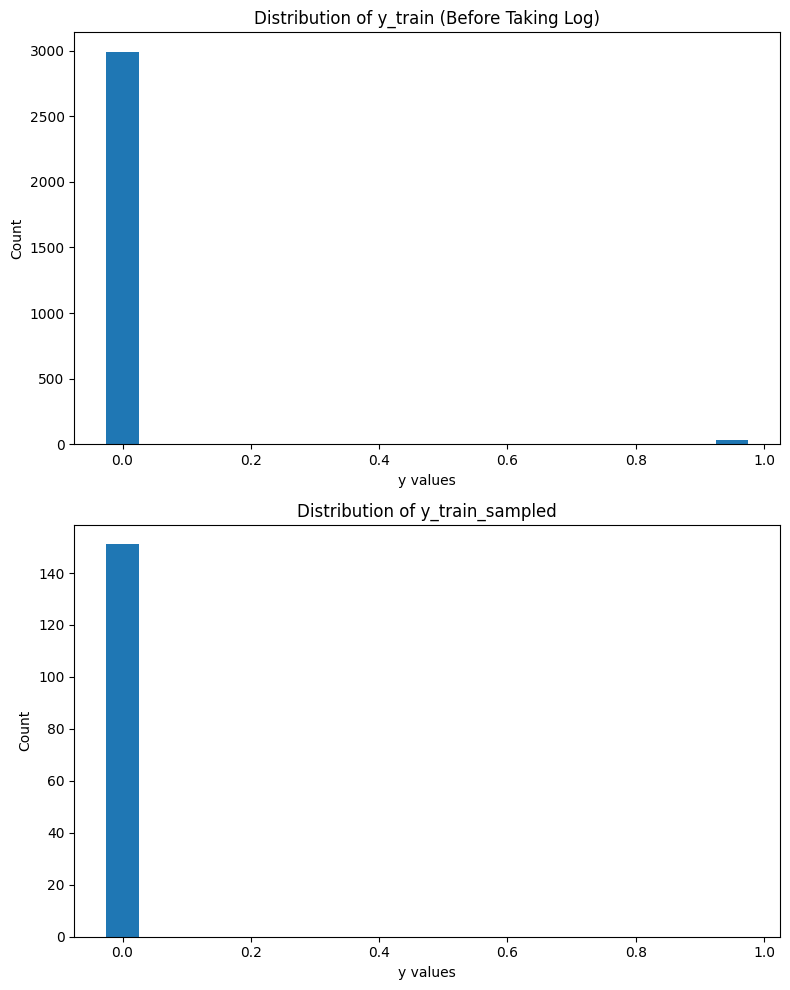

151


In [2]:
bin_edges = np.linspace(0, 1, num=21)

hist, bin_edges = np.histogram(y_train, bins=bin_edges)
print(len(y_train))

# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
# ax1.bar(bin_edges[:-1], hist, width=0.05)
# ax1.set_title('Distribution of y_train (Before Taking Log)')
# ax1.set_xlabel('y values')
# ax1.set_ylabel('Count')

hist_log = np.log(hist + 1)
# hist_log = np.log(hist_log + 1)
# hist_log = np.log(hist_log + 1)
hist_log = np.ones(hist_log.shape)
hist_log_norm = hist_log / np.sum(hist_log)
print(hist_log_norm)
# # [0.         0.0312592  0.04000554 0.03927602 0.04294942 0.04840352
# #  0.05252923 0.05689486 0.06303176 0.0633484  0.07275313 0.05918789
# #  0.06092189 0.05710447 0.05275093 0.05346306 0.05456898 0.05097607
# #  0.05342812 0.0471475 ]
# ax2.bar(bin_edges[:-1], hist_log, width=0.05)
# ax2.set_title('Distribution of y_train (After Taking Log)')
# ax2.set_xlabel('y values')
# ax2.set_ylabel('Log Count')

# # plt.tight_layout()
# # plt.show()


sample_indices = []
for i in range(len(bin_edges[:-1])):
    indices = np.where(np.digitize(y_train, bin_edges) == i)[0]
    num_samples = int(hist_log_norm[i] * len(X_train))
    if len(indices) > 0:
        samples = np.random.choice(indices, size=num_samples, replace=(num_samples > len(indices)))
        sample_indices.extend(samples)

sample_indices = np.array(sample_indices)

X_train_sampled = X_train[sample_indices]
y_train_sampled = y_train[sample_indices]

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

ax1.bar(bin_edges[:-1], hist, width=0.05)
ax1.set_title('Distribution of y_train (Before Taking Log)')
ax1.set_xlabel('y values')
ax1.set_ylabel('Count')

hist_sampled, _ = np.histogram(y_train_sampled, bins=bin_edges)
ax2.bar(bin_edges[:-1], hist_sampled, width=0.05)
ax2.set_title('Distribution of y_train_sampled')
ax2.set_xlabel('y values')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()
X_train, y_train = X_train_sampled, y_train_sampled
print(len(y_train_sampled))

In [9]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

import numpy as np

train_data = lgb.Dataset(X_train, label=y_train, weight=w_train)

params = {
    'learning_rate': 0.03, 
    'max_depth': -1, 
    'metric': {'binary_logloss', 'auc'},
    "boosting": "gbdt",
    'n_estimators': 500,
    "nthread": 24, 
    'num_leaves': 71, 
    'objective': 'binary'
}

model = lgb.train(params, train_data, num_boost_round=750)


# # Define the parameter grid for grid search
# param_grid = {
#     'objective': ['regression'],
#     'metric': ['l1'],
#     'num_leaves': [31, 51, 71],
#     'max_depth': [10, 15, 20],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [100, 200, 300]
# }

# # Define the LightGBM model
# model = lgb.LGBMRegressor()

# # Perform grid search
# grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
# grid_search.fit(X_train, y_train)

# # Get the best parameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Make predictions on the test set using the best model
# y_pred = best_model.predict(X_test)

[LightGBM] [Info] Number of positive: 32, number of negative: 2990
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.101354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 246840
[LightGBM] [Info] Number of data points in the train set: 3022, number of used features: 968
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.010589 -> initscore=-4.537293
[LightGBM] [Info] Start training from score -4.537293
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(bool)

# 假分类准确率
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# 分类报告
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# 打印预测和实际值
for i in range(len(y_test)):
    print(f'{i}, {y_pred[i]}, {y_test[i]}')


Accuracy: 0.9880952380952381
Confusion Matrix:
 [[747   0]
 [  9   0]]
Classification Report:
               precision    recall  f1-score   support

       False       0.99      1.00      0.99       747
        True       0.00      0.00      0.00         9

    accuracy                           0.99       756
   macro avg       0.49      0.50      0.50       756
weighted avg       0.98      0.99      0.98       756

0, False, False
1, False, False
2, False, False
3, False, False
4, False, False
5, False, False
6, False, False
7, False, False
8, False, False
9, False, False
10, False, False
11, False, False
12, False, False
13, False, False
14, False, False
15, False, False
16, False, False
17, False, False
18, False, False
19, False, False
20, False, False
21, False, False
22, False, False
23, False, False
24, False, False
25, False, False
26, False, False
27, False, False
28, False, False
29, False, True
30, False, False
31, False, False
32, False, False
33, False, False
34, False, 

/root/miniconda3/envs/pyserini/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/envs/pyserini/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/envs/pyserini/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

# Get train data for bert

In [1]:
import numpy as np
from tqdm import tqdm
import os

io_path = '/dk/lcj_rag/pyserini-autofusion/experiments/runs'

depth=1000
#  alpha*bf + (1-alpha)*bm25
nq = -1
k=100

train_bf_trec_path = f'{io_path}/base_trec/run.dpr.nq-train.multi.bf.trec'
train_bm25_trec_path = f'{io_path}/base_trec/run.dpr.nq-train.bm25.trec'
cache_path = '/dk/lcj_rag/pyserini-autofusion/experiments/cache/'
fusion_tag = 'fusion'

train_embedding_path = '/dk/rag-dataset/queries/query-embedding-dpr_multi-nq-train-20240429-9323ec.fabc40f467c7f2262628ce1e135b0337/embedding.pkl'
filename = f'{io_path}/nq_train/run.dpr.nq-train.{fusion_tag}.all-alpha.k-{k}.res'



In [3]:
import csv
import numpy as np
import pickle
import json

cutoff = 200
pkl_file = f'/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_train/nq_train_Xy-top{cutoff}.pkl'
csv_file = f'/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_train/nq_train_Xy-top{cutoff}.csv'
qa_path = '/root/.cache/anserini/topics-and-qrels/'
qa_file = f'{qa_path}topics.dpr.nq.train.txt'

with open(qa_file, 'r', encoding='utf-8') as file:
    data = [line.split('\t')[0] for line in file]

questions = [item for item in data]

questions_np = np.array(questions)
for question in questions[:5]:
    # what kind of money to take to bahamas?
    print(question)

questions_np = questions_np.reshape(-1, 1)
for question in questions_np[:5]:
    # ['what kind of money to take to bahamas?']
    print(question)


# # Load data using pickle
with open(pkl_file, 'rb') as f:
    Xy_np = pickle.load(f)
    X_np = Xy_np[:, :-1]
    y_np = Xy_np[:, -1].reshape(-1, 1)

X_np = X_np[:, 768:]
X_np = np.hstack((X_np[:, :100], X_np[:, 200:300]))
print(f'questions_np.shape: {questions_np.shape}')
print(f'X_np.shape: {X_np.shape}')

# for q in range(X_np.shape[0]):
#     print(np.hstack((X_np[q, :5], X_np[q, 100:100 + 5])), y_np[q])
    # print(X_np[q, 99] / X_np[q, 0], X_np[q, 199] / X_np[q, 100], y_np[q])

X_np = np.hstack((questions_np, X_np))


print(X_np.shape)
print(y_np.shape)
print(np.mean(y_np))

# y_np = (np.abs(y_np - 0.5) >= 0.25).astype(int)
print(y_np[:200])
print(np.sum(y_np))
print(np.mean(y_np))

Xy_np = np.concatenate((X_np, y_np), axis=1)
bert_train = f'/dk/lcj_rag/pyserini-autofusion/experiments/runs/nq_train/nq_bert_regression_train_Xy-top100.pkl'
with open(bert_train, 'wb') as f:
    pickle.dump(Xy_np, f)


total number of death row inmates in the us
big little lies season 2 how many episodes
who sang waiting for a girl like you
where do you cross the arctic circle in norway
who is the main character in green eggs and ham
['total number of death row inmates in the us']
['big little lies season 2 how many episodes']
['who sang waiting for a girl like you']
['where do you cross the arctic circle in norway']
['who is the main character in green eggs and ham']
questions_np.shape: (79168, 1)
X_np.shape: (79168, 200)
(79168, 201)
(79168, 1)
0.5181122423201294
[[0.5 ]
 [0.51]
 [0.47]
 [0.48]
 [0.52]
 [0.52]
 [0.52]
 [0.5 ]
 [0.52]
 [0.53]
 [0.53]
 [0.45]
 [0.54]
 [0.52]
 [0.52]
 [0.49]
 [0.51]
 [0.62]
 [0.5 ]
 [0.56]
 [0.52]
 [0.52]
 [0.49]
 [0.52]
 [0.5 ]
 [0.5 ]
 [0.52]
 [0.56]
 [0.5 ]
 [0.5 ]
 [0.52]
 [0.5 ]
 [0.51]
 [0.52]
 [0.5 ]
 [0.57]
 [0.49]
 [0.52]
 [0.5 ]
 [0.45]
 [0.57]
 [0.5 ]
 [0.52]
 [0.52]
 [0.62]
 [0.5 ]
 [0.48]
 [0.52]
 [0.57]
 [0.48]
 [0.5 ]
 [0.52]
 [0.52]
 [0.47]
 [0.53]
 [0

# Get test data for BERT

In [1]:
import csv
import numpy as np
import pickle
import json

cutoff = 200
qa_path = '/root/.cache/anserini/topics-and-qrels/'
qa_file = f'{qa_path}topics.dpr.wq.test.txt'
print(qa_file)

with open(qa_file, 'r', encoding='utf-8') as file:
    data = [json.loads(line) for line in file]

questions = [item['question'] for item in data]
print(questions[0])
# questions = [question for question in questions]

questions_np = np.array(questions)
for question in questions[:5]:
    # what kind of money to take to bahamas?
    print(question)

questions_np = questions_np.reshape(-1, 1)
for question in questions_np[:5]:
    # ['what kind of money to take to bahamas?']
    print(question)

pkl_file = '/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_train/wq_test_X.pkl'
csv_file = '/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_train/wq_test_X.csv'
with open(csv_file, 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
    X_np = np.array(data).astype(float)

with open(pkl_file, 'wb') as f:
    pickle.dump(X_np, f)

# Load data using pickle
with open(pkl_file, 'rb') as f:
    X_np = pickle.load(f)


X_np = X_np[:, 768:]
print(f'questions_np.shape: {questions_np.shape}')
print(f'X_np.shape: {X_np.shape}')
X_np = np.hstack((questions_np, X_np))


print(X_np.shape)

bert_test = f'/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_test/wq_bert_test_Xy-top100.pkl'
with open(bert_test, 'wb') as f:
    pickle.dump(X_np, f)



/root/.cache/anserini/topics-and-qrels/topics.dpr.wq.test.txt
what does jamaican people speak?
what does jamaican people speak?
what did james k polk do before he was president?
what is the oregon ducks 2012 football schedule?
who plays ken barlow in coronation street?
what happened after mr. sugihara died?
['what does jamaican people speak?']
['what did james k polk do before he was president?']
['what is the oregon ducks 2012 football schedule?']
['who plays ken barlow in coronation street?']
['what happened after mr. sugihara died?']
questions_np.shape: (2032, 1)
X_np.shape: (2032, 200)
(2032, 201)


# Test BERT

In [4]:
import numpy as np
from tqdm import tqdm
import os

io_path = '/dk/lcj_rag/pyserini-autofusion/experiments/runs'

depth=1000
#  alpha*bf + (1-alpha)*bm25
nq = -1
k=100

test_bf_trec_path = f'{io_path}/base_trec/run.dpr.wq-test.multi.bf.trec'
test_bm25_trec_path = f'{io_path}/base_trec/run.dpr.wq-test.bm25.trec'
cache_path = '/dk/lcj_rag/pyserini-autofusion/experiments/cache/'
fusion_tag = 'dpr.bm25.fusion.gt'

filename = f'{io_path}/wq_test/run.dpr.wq-test.{fusion_tag}.all-alpha.nq-{nq}.k-{k}.res'
test_embedding_path = '/dk/rag-dataset/queries/query-embedding-dpr_multi-wq-test-20210419-9323ec.19aa721632d05afe031cc2da83a9a5a5/embedding.pkl'



In [5]:
alphafile = '/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_test/wq_bert_test_predictions.csv'
test_out_trec_path = f'{io_path}/wq_test/run.dpr.wq-test.{fusion_tag}.alpha-custom-bert.k-{k}.trec'
test_out_json_path = f'{io_path}/wq_test/run.dpr.wq-test.{fusion_tag}.alpha-custom-bert.k-{k}.json'

cmd0 = f'python -m pyserini.autofusion \
        --runs {test_bf_trec_path} {test_bm25_trec_path}    \
        --runtag {fusion_tag}-custom \
        --method custom  \
        --alphafile {alphafile} \
        --depth {depth}  \
        --nq -1  \
        --k {k} \
        --output {test_out_trec_path}'
os.system(cmd0)

In [ ]:

cache_path = '/dk/lcj_rag/pyserini-autofusion/experiments/cache/'
cmd1 = f'python -m pyserini.eval.convert_trec_run_to_dpr_retrieval_run_on_cache \
  --index wikipedia-dpr-100w \
  --topics dpr-wq-test \
  --gt {cache_path}wq_test_bf_qid_gt_set.pkl {cache_path}wq_test_bm25_qid_gt_set.pkl \
  --input {test_out_trec_path} \
  --output {test_out_json_path}'
os.system(cmd1)

resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


Jun 01, 2024 2:02:11 AM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
100%|██████████| 203200/203200 [00:28<00:00, 7024.66it/s]


0

In [ ]:
# test_out_json_path = f'{io_path}/wq_test/run.dpr.wq-test.{fusion_tag}.alpha-gt.k-{k}.json'
nq = -1
test_out_json_path = f'{io_path}/wq_test/run.dpr.wq-test.{fusion_tag}.alpha-custom-bert.k-{k}.json'
print(test_out_json_path)
cmd2 = f'python -m pyserini.eval.evaluate_dpr_retrieval \
  --retrieval {test_out_json_path} \
  --topk 100'
os.system(cmd2)


/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_test/run.dpr.wq-test.dpr.bm25.fusion.gt.alpha-custom-bert.k-100.json


100%|██████████| 2032/2032 [00:00<00:00, 19229.55it/s]


qid: 4	Top100	has_answer: 0
qid: 5	Top100	has_answer: 0
qid: 21	Top100	has_answer: 0
qid: 25	Top100	has_answer: 0
qid: 46	Top100	has_answer: 0
qid: 51	Top100	has_answer: 0
qid: 59	Top100	has_answer: 0
qid: 63	Top100	has_answer: 0
qid: 113	Top100	has_answer: 0
qid: 120	Top100	has_answer: 0
qid: 131	Top100	has_answer: 0
qid: 136	Top100	has_answer: 0
qid: 141	Top100	has_answer: 0
qid: 152	Top100	has_answer: 0
qid: 155	Top100	has_answer: 0
qid: 163	Top100	has_answer: 0
qid: 176	Top100	has_answer: 0
qid: 178	Top100	has_answer: 0
qid: 183	Top100	has_answer: 0
qid: 192	Top100	has_answer: 0
qid: 194	Top100	has_answer: 0
qid: 210	Top100	has_answer: 0
qid: 215	Top100	has_answer: 0
qid: 223	Top100	has_answer: 0
qid: 230	Top100	has_answer: 0
qid: 236	Top100	has_answer: 0
qid: 238	Top100	has_answer: 0
qid: 240	Top100	has_answer: 0
qid: 242	Top100	has_answer: 0
qid: 244	Top100	has_answer: 0
qid: 245	Top100	has_answer: 0
qid: 251	Top100	has_answer: 0
qid: 252	Top100	has_answer: 0
qid: 257	Top100	has_

0

## Get test ground truth


In [27]:
import numpy as np
from tqdm import tqdm
import os

io_path = '/dk/lcj_rag/pyserini-autofusion/experiments/runs'

depth=1000
#  alpha*bf + (1-alpha)*bm25
nq = -1
k=100

test_bf_trec_path = f'{io_path}/base_trec/run.dpr.wq-test.multi.bf.trec'
test_bm25_trec_path = f'{io_path}/base_trec/run.dpr.wq-test.bm25.trec'
cache_path = '/dk/lcj_rag/pyserini-autofusion/experiments/cache/'
fusion_tag = 'dpr.bm25.fusion.gt'

filename = f'{io_path}/wq_test/run.dpr.wq-test.{fusion_tag}.all-alpha.nq-{nq}.k-{k}.res'
test_embedding_path = '/dk/rag-dataset/queries/query-embedding-dpr_multi-wq-test-20210419-9323ec.19aa721632d05afe031cc2da83a9a5a5/embedding.pkl'



In [3]:
nq = -1
for alpha in tqdm(np.arange(0, 1.05, 0.05)):
    alpha = round(alpha, 2)
    alphafile = f'/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_test/alpha-{alpha}.csv'
    test_out_trec_path = f'{io_path}/wq_test/run.dpr.wq-test.{fusion_tag}.alpha-{alpha}.nq-{nq}.k-{k}.trec'
    test_out_json_path = f'{io_path}/wq_test/run.dpr.wq-test.{fusion_tag}.alpha-{alpha}.nq-{nq}.k-{k}.json'
    cmd0 = f'python -m pyserini.autofusion \
            --runs {test_bf_trec_path} {test_bm25_trec_path}    \
            --runtag {fusion_tag}-custom \
            --method custom  \
            --alphafile {alphafile} \
            --depth {depth}  \
            --nq {nq}  \
            --k {k} \
            --output {test_out_trec_path}'
    # print(cmd0)
    os.system(cmd0)

    cmd1 = f'python -m pyserini.eval.convert_trec_run_to_dpr_retrieval_run \
        --index wikipedia-dpr-100w \
        --topics dpr-wq-test \
        --input {test_out_trec_path} \
        --output {test_out_json_path}'
    os.system(cmd1)

  0%|          | 0/21 [00:00<?, ?it/s]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 24, 2024 12:36:17 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
  5%|▍         | 1/21 [08:51<2:57:06, 531.33s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 24, 2024 12:45:04 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 10%|▉         | 2/21 [13:02<1:56:06, 366.65s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 24, 2024 12:49:16 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 14%|█▍        | 3/21 [16:36<1:29:03, 296.88s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 24, 2024 12:52:52 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 19%|█▉        | 4/21 [20:31<1:17:09, 272.32s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 24, 2024 12:56:45 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 24%|██▍       | 5/21 [24:03<1:06:48, 250.51s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 24, 2024 1:00:19 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 29%|██▊       | 6/21 [27:34<59:18, 237.21s/it]  

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 24, 2024 1:03:47 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 33%|███▎      | 7/21 [31:01<53:04, 227.47s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 24, 2024 1:07:15 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 38%|███▊      | 8/21 [34:30<47:57, 221.38s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 24, 2024 1:10:45 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 43%|████▎     | 9/21 [38:00<43:35, 217.92s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 24, 2024 1:14:13 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 48%|████▊     | 10/21 [41:27<39:20, 214.57s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 24, 2024 1:17:40 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 52%|█████▏    | 11/21 [44:53<35:19, 211.95s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 24, 2024 1:21:07 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 57%|█████▋    | 12/21 [48:23<31:41, 211.26s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 24, 2024 1:24:36 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 62%|██████▏   | 13/21 [51:50<28:00, 210.01s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 24, 2024 1:27:57 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 67%|██████▋   | 14/21 [55:07<24:01, 205.97s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 24, 2024 1:31:20 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 71%|███████▏  | 15/21 [58:37<20:43, 207.24s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 24, 2024 1:34:50 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 76%|███████▌  | 16/21 [1:02:09<17:24, 208.86s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 24, 2024 1:38:26 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 81%|████████  | 17/21 [1:05:41<13:58, 209.66s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 24, 2024 1:41:54 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 86%|████████▌ | 18/21 [1:09:12<10:30, 210.08s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 24, 2024 1:45:25 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 90%|█████████ | 19/21 [1:12:42<07:00, 210.02s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 24, 2024 1:48:55 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 95%|█████████▌| 20/21 [1:16:14<03:30, 210.53s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 24, 2024 1:52:30 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
100%|██████████| 21/21 [1:19:46<00:00, 227.94s/it]


In [11]:
filename = f'{io_path}/wq_test/run.dpr.wq-test.{fusion_tag}.all-alpha.nq-{nq}.k-{k}.res'
test_out_json_path = f'{io_path}/wq_test/run.dpr.wq-test.{fusion_tag}.alpha-?.nq-{nq}.k-{k}.json'

cmd2 = f'python -m pyserini.eval.evaluate_dpr_retrieval_all_alpha \
    --retrieval {test_out_json_path} \
    --topk 100  \
    --traindata False'
res = os.system(cmd2 + f'1> {filename}')
print(filename)

  0%|          | 0/21 [00:00<?, ?it/s]
0it [00:00, ?it/s]
2032it [00:00, 18082.54it/s]
  5%|▍         | 1/21 [00:00<00:14,  1.40it/s]
0it [00:00, ?it/s]
2032it [00:00, 18520.68it/s]
 10%|▉         | 2/21 [00:01<00:12,  1.51it/s]
0it [00:00, ?it/s]
2032it [00:00, 17750.60it/s]
 14%|█▍        | 3/21 [00:01<00:11,  1.55it/s]
0it [00:00, ?it/s]
2032it [00:00, 19050.61it/s]
 19%|█▉        | 4/21 [00:02<00:10,  1.58it/s]
0it [00:00, ?it/s]
2032it [00:00, 17630.27it/s]
 24%|██▍       | 5/21 [00:03<00:10,  1.57it/s]
0it [00:00, ?it/s]
2032it [00:00, 18341.63it/s]
 29%|██▊       | 6/21 [00:03<00:09,  1.50it/s]
0it [00:00, ?it/s]
2032it [00:00, 18977.02it/s]
 33%|███▎      | 7/21 [00:04<00:09,  1.54it/s]
0it [00:00, ?it/s]
2032it [00:00, 18670.22it/s]
 38%|███▊      | 8/21 [00:05<00:08,  1.56it/s]
0it [00:00, ?it/s]
2032it [00:00, 18819.29it/s]
 43%|████▎     | 9/21 [00:05<00:07,  1.58it/s]
0it [00:00, ?it/s]
2032it [00:00, 18631.20it/s]
 48%|████▊     | 10/21 [00:06<00:06,  1.59it/s]
0it [00:00

/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_test/run.dpr.wq-test.dpr.bm25.fusion.gt.all-alpha.nq--1.k-100.res


In [12]:
print(test_out_json_path)

/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_test/run.dpr.wq-test.dpr.bm25.fusion.gt.alpha-?.nq--1.k-100.json


In [62]:
import csv
with open(filename, 'r') as f:
    print(f'filename: {filename}')
    reader = csv.reader(f, delimiter='\t')
    rows = list(reader)
    print(rows[:5])
    gt_y = [float(alpha) for qid, alpha, num_hits in rows]
    gt_y = np.array(gt_y)

gt_y = np.abs(gt_y - 0.5) > 0.25
print(np.sum(gt_y))
gt_y = np.array([1.0 if y else 0.5 for y in gt_y])
print(gt_y)
print(np.mean(gt_y))

nq = -1
gt_csv = f'{io_path}/wq_test/run.dpr.wq-test.{fusion_tag}.alpha-gt.nq-{nq}.k-{k}.csv'
with open(gt_csv, 'w') as f:
    writer = csv.writer(f, delimiter='\n')
    for alpha in gt_y:
        writer.writerow([alpha])
print(gt_csv)

filename: /dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_test/run.dpr.wq-test.dpr.bm25.fusion.gt.all-alpha.nq--1.k-100.res
[['0', '0.49', '92'], ['1', '0.54', '65'], ['2', '0.45', '731'], ['3', '0.52', '86'], ['4', '0.5', '0']]
57
[0.5 0.5 0.5 ... 0.5 0.5 0.5]
0.5140255905511811
/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_test/run.dpr.wq-test.dpr.bm25.fusion.gt.alpha-gt.nq--1.k-100.csv


In [63]:

nq = -1
alphafile = f'{io_path}/wq_test/run.dpr.wq-test.{fusion_tag}.alpha-gt.nq--1.k-{k}.csv'
test_out_trec_path = f'{io_path}/wq_test/run.dpr.wq-test.{fusion_tag}.alpha-gt.nq-{nq}.k-{k}.trec'
test_out_json_path = f'{io_path}/wq_test/run.dpr.wq-test.{fusion_tag}.alpha-gt.nq-{nq}.k-{k}.json'
cmd0 = f'python -m pyserini.autofusion \
        --runs {test_bf_trec_path} {test_bm25_trec_path}    \
        --runtag {fusion_tag}-custom \
        --method custom  \
        --alphafile {alphafile} \
        --depth {depth}  \
        --nq {nq}  \
        --k {k} \
        --output {test_out_trec_path}'
os.system(cmd0)

num_queries: 2032000


0

In [32]:
test_out_json_path = f'{io_path}/wq_test/run.dpr.wq-test.{fusion_tag}.alpha-gt.nq-{nq}.k-{k}.json'
print(test_out_json_path)

/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_test/run.dpr.wq-test.dpr.bm25.fusion.gt.alpha-gt.nq--1.k-100.json


In [64]:
# cmd1 = f'python -m pyserini.eval.convert_trec_run_to_dpr_retrieval_run \
#   --index wikipedia-dpr-100w \
#   --topics dpr-wq-test \
#   --input {test_out_trec_path} \
#   --output {test_out_json_path}'
# os.system(cmd1)

cache_path = '/dk/lcj_rag/pyserini-autofusion/experiments/cache/'
cmd1 = f'python -m pyserini.eval.convert_trec_run_to_dpr_retrieval_run_on_cache \
  --index wikipedia-dpr-100w \
  --topics dpr-wq-test \
  --gt {cache_path}wq_test_bf_qid_gt_set.pkl {cache_path}wq_test_bm25_qid_gt_set.pkl \
  --input {test_out_trec_path} \
  --output {test_out_json_path}'
os.system(cmd1)

resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 26, 2024 3:06:28 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
100%|██████████| 203200/203200 [00:28<00:00, 7106.36it/s]


0

In [65]:
# test_out_json_path = f'{io_path}/wq_test/run.dpr.wq-test.{fusion_tag}.alpha-gt.k-{k}.json'
nq = -1
test_out_json_path = f'{io_path}/wq_test/run.dpr.wq-test.{fusion_tag}.alpha-gt.nq-{nq}.k-{k}.json'
print(test_out_json_path)
cmd2 = f'python -m pyserini.eval.evaluate_dpr_retrieval \
  --retrieval {test_out_json_path} \
  --topk 100'
os.system(cmd2)
# bm25 + bf
# Top20	accuracy: 0.1748
# Top100	accuracy: 0.8535

# bf + bm25
# Top20	accuracy: 0.1650
# Top100	accuracy: 0.8555


/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_test/run.dpr.wq-test.dpr.bm25.fusion.gt.alpha-gt.nq--1.k-100.json


100%|██████████| 2032/2032 [00:00<00:00, 19059.73it/s]


qid: 4	Top100	has_answer: 0
qid: 5	Top100	has_answer: 0
qid: 21	Top100	has_answer: 0
qid: 25	Top100	has_answer: 0
qid: 46	Top100	has_answer: 0
qid: 51	Top100	has_answer: 0
qid: 59	Top100	has_answer: 0
qid: 63	Top100	has_answer: 0
qid: 113	Top100	has_answer: 0
qid: 131	Top100	has_answer: 0
qid: 136	Top100	has_answer: 0
qid: 141	Top100	has_answer: 0
qid: 152	Top100	has_answer: 0
qid: 155	Top100	has_answer: 0
qid: 163	Top100	has_answer: 0
qid: 176	Top100	has_answer: 0
qid: 178	Top100	has_answer: 0
qid: 183	Top100	has_answer: 0
qid: 192	Top100	has_answer: 0
qid: 194	Top100	has_answer: 0
qid: 210	Top100	has_answer: 0
qid: 215	Top100	has_answer: 0
qid: 223	Top100	has_answer: 0
qid: 230	Top100	has_answer: 0
qid: 236	Top100	has_answer: 0
qid: 238	Top100	has_answer: 0
qid: 240	Top100	has_answer: 0
qid: 242	Top100	has_answer: 0
qid: 244	Top100	has_answer: 0
qid: 245	Top100	has_answer: 0
qid: 251	Top100	has_answer: 0
qid: 257	Top100	has_answer: 0
qid: 268	Top100	has_answer: 0
qid: 272	Top100	has_

0

## Get test features

In [1]:
import numpy as np
from tqdm import tqdm
import os

io_path = '/dk/lcj_rag/pyserini-autofusion/experiments/runs'

depth=1000
#  alpha*bf + (1-alpha)*bm25
nq = -1
k=100

test_bf_trec_path = f'{io_path}/base_trec/run.dpr.wq-test.multi.bf.trec'
test_bm25_trec_path = f'{io_path}/base_trec/run.dpr.wq-test.bm25.trec'
cache_path = '/dk/lcj_rag/pyserini-autofusion/experiments/cache/'
fusion_tag = 'fusion'

filename = f'{io_path}/nq_train/run.dpr.wq-test.{fusion_tag}.all-alpha.k-{k}.res'
test_embedding_path = '/dk/rag-dataset/queries/query-embedding-dpr_multi-wq-test-20210419-9323ec.19aa721632d05afe031cc2da83a9a5a5/embedding.pkl'



In [44]:
import csv
import pickle

with open(test_bf_trec_path, 'r') as f:
    print(f'test_bf_trec_path: {test_bf_trec_path}')
    reader = csv.reader(f, delimiter=' ')
    rows = list(reader)
    print(rows[:5])
    curr = []
    bf_score_list = []
    for i, row in enumerate(rows):
        qid, _, docid, rank, score, _ = row
        qid = int(qid)
        rank = int(rank)
        score = float(score)
        if rank <= 100:
            curr.append(score)
            if rank == 100:
                bf_score_list.append(curr)
                curr = []
        else:
            continue

with open(test_bm25_trec_path, 'r') as f:
    print(f'test_bm25_trec_path: {test_bm25_trec_path}')
    reader = csv.reader(f, delimiter=' ')
    rows = list(reader)
    print(rows[:5])
    curr = []
    bm25_score_list = []
    for i, row in enumerate(rows):
        qid, _, docid, rank, score, _ = row
        qid = int(qid)        
        rank = int(rank)
        score = float(score)
        if rank <= 100:
            curr.append(score)
            if rank == 100:
                bm25_score_list.append(curr)
                curr = []
        else:
            continue

with open(test_embedding_path, 'rb') as f:
    print(f'test_embedding_path: {test_embedding_path}')
    embeddings = pickle.load(f)
    embeddings = embeddings['embedding'].tolist()
    print(embeddings[:5])

test_bf_trec_path: /dk/lcj_rag/pyserini-autofusion/experiments/runs/base_trec/run.dpr.wq-test.multi.bf.trec
[['0', 'Q0', '212767', '1', '88.625778', 'Faiss'], ['0', 'Q0', '12057677', '2', '88.313698', 'Faiss'], ['0', 'Q0', '1353782', '3', '87.183723', 'Faiss'], ['0', 'Q0', '1353793', '4', '87.056084', 'Faiss'], ['0', 'Q0', '7783985', '5', '86.984970', 'Faiss']]
test_bm25_trec_path: /dk/lcj_rag/pyserini-autofusion/experiments/runs/base_trec/run.dpr.wq-test.bm25.trec
[['0', 'Q0', '14369298', '1', '13.109635', 'Anserini'], ['0', 'Q0', '7788138', '2', '11.006025', 'Anserini'], ['0', 'Q0', '2596624', '3', '10.473339', 'Anserini'], ['0', 'Q0', '9644827', '4', '10.460495', 'Anserini'], ['0', 'Q0', '10122808', '5', '10.078284', 'Anserini']]
test_embedding_path: /dk/rag-dataset/queries/query-embedding-dpr_multi-wq-test-20210419-9323ec.19aa721632d05afe031cc2da83a9a5a5/embedding.pkl
[array([-2.15203688e-01, -3.46871883e-01, -4.25327979e-02,  5.03410220e-01,
        3.69485885e-01, -3.36328801e-03

In [45]:
nq = len(embeddings)
print(nq)

print(len(embeddings), len(embeddings[0]))
print(len(bf_score_list), len(bf_score_list[0]))
print(len(bm25_score_list), len(bm25_score_list[0]))

X = [list(embeddings[i]) + bf_score_list[i] + bm25_score_list[i] for i in range(nq)]
# X = [bf_score_list[i] + bm25_score_list[i] for i in range(nq)]


with open('/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_train/wq_test_X.csv', 'w') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerows(X)

2032
2032 768
2032 100
2032 100


In [36]:
import csv
import numpy as np
import pickle

pkl_file = '/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_train/wq_test_X.pkl'
csv_file = '/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_train/wq_test_X.csv'
with open(csv_file, 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
    X_np = np.array(data).astype(float)

# with open(pkl_file, 'wb') as f:
#     pickle.dump(X_np, f)

# Load data using pickle
# with open(pkl_file, 'rb') as f:
#     X_np = pickle.load(f)

# X_np = X_np[:, 768:]
print(X_np.shape)

X_test = X_np

(2032, 968)


In [37]:
y_pred = model.predict(X_test)
print(y_pred)
print(f'average of y_pred: {np.mean(y_pred)}')

alphafile = '/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_train/wq_test_y_pred.csv'
test_out_trec_path = f'{io_path}/wq_train/run.dpr.wq-test.{fusion_tag}.alpha-custom.k-{k}.trec'
test_out_json_path = f'{io_path}/wq_train/run.dpr.wq-test.{fusion_tag}.alpha-custom.k-{k}.json'


with open(alphafile, 'w') as f:
    writer = csv.writer(f, delimiter='\n')
    writer.writerow(y_pred)

[0.51482171 0.50112217 0.52405172 ... 0.63388112 0.68954788 0.575927  ]
average of y_pred: 0.6202570724764372


In [2]:

# alpha = 0.25
# alphafile = f'/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_train/alpha-{alpha}.csv'
# test_out_trec_path = f'{io_path}/wq_train/run.dpr.wq-test.{fusion_tag}.alpha-{alpha}.k-{k}.trec'
# test_out_json_path = f'{io_path}/wq_train/run.dpr.wq-test.{fusion_tag}.alpha-{alpha}.k-{k}.json'
# alphafile = '/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_train/wq_test_y_pred.csv'
# test_out_trec_path = f'{io_path}/wq_train/run.dpr.wq-test.{fusion_tag}.alpha-custom.k-{k}.trec'
# test_out_json_path = f'{io_path}/wq_train/run.dpr.wq-test.{fusion_tag}.alpha-custom.k-{k}.json'
# cmd0 = f'python -m pyserini.autofusion \
#         --runs {test_bf_trec_path} {test_bm25_trec_path}    \
#         --runtag {fusion_tag}-custom \
#         --method custom  \
#         --alphafile {alphafile} \
#         --depth {depth}  \
#         --nq -1  \
#         --k {k} \
#         --output {test_out_trec_path}'
# os.system(cmd0)

test_out_trec_path = f'{io_path}/wq_test/run.dpr.wq-test.{fusion_tag}.rrf.k-{k}.trec'
test_out_json_path = f'{io_path}/wq_test/run.dpr.wq-test.{fusion_tag}.rrf.k-{k}.json'
cmd0 = f'python -m pyserini.autofusion \
        --runs {test_bf_trec_path} {test_bm25_trec_path}    \
        --runtag {fusion_tag}-rrf \
        --method rrf  \
        --depth {depth}  \
        --nq -1  \
        --k {k} \
        --output {test_out_trec_path}'
os.system(cmd0)

0

In [15]:
print(test_out_trec_path)
print(test_out_json_path)

/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_test/run.dpr.wq-test.fusion.rrf.k-100.trec
/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_test/run.dpr.wq-test.fusion.rrf.k-100.json


In [3]:
cmd1 = f'python -m pyserini.eval.convert_trec_run_to_dpr_retrieval_run \
  --index wikipedia-dpr-100w \
  --topics dpr-wq-test \
  --input {test_out_trec_path} \
  --output {test_out_json_path}'
os.system(cmd1)

resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 28, 2024 12:46:45 AM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
100%|██████████| 203200/203200 [02:37<00:00, 1286.56it/s]


0

In [4]:
# alpha = 0.25
# test_out_json_path = f'{io_path}/wq_train/run.dpr.wq-test.{fusion_tag}.alpha-{alpha}.k-{k}.json'
# test_out_json_path = f'{io_path}/wq_train/run.dpr.wq-test.{fusion_tag}.alpha-custom.k-{k}.json'
test_out_json_path = f'{io_path}/wq_test/run.dpr.wq-test.{fusion_tag}.rrf.k-{k}.json'
cmd2 = f'python -m pyserini.eval.evaluate_dpr_retrieval \
  --retrieval {test_out_json_path} \
  --topk 100'
os.system(cmd2)



100%|██████████| 2032/2032 [00:00<00:00, 19007.36it/s]


qid: 4	Top100	has_answer: 0
qid: 5	Top100	has_answer: 0
qid: 21	Top100	has_answer: 0
qid: 25	Top100	has_answer: 0
qid: 46	Top100	has_answer: 0
qid: 51	Top100	has_answer: 0
qid: 59	Top100	has_answer: 0
qid: 63	Top100	has_answer: 0
qid: 113	Top100	has_answer: 0
qid: 131	Top100	has_answer: 0
qid: 136	Top100	has_answer: 0
qid: 141	Top100	has_answer: 0
qid: 145	Top100	has_answer: 0
qid: 152	Top100	has_answer: 0
qid: 155	Top100	has_answer: 0
qid: 163	Top100	has_answer: 0
qid: 176	Top100	has_answer: 0
qid: 178	Top100	has_answer: 0
qid: 183	Top100	has_answer: 0
qid: 192	Top100	has_answer: 0
qid: 194	Top100	has_answer: 0
qid: 215	Top100	has_answer: 0
qid: 223	Top100	has_answer: 0
qid: 230	Top100	has_answer: 0
qid: 236	Top100	has_answer: 0
qid: 238	Top100	has_answer: 0
qid: 240	Top100	has_answer: 0
qid: 242	Top100	has_answer: 0
qid: 245	Top100	has_answer: 0
qid: 251	Top100	has_answer: 0
qid: 257	Top100	has_answer: 0
qid: 260	Top100	has_answer: 0
qid: 268	Top100	has_answer: 0
qid: 272	Top100	has_

0

In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np

for alpha in tqdm(np.arange(0, 1.05, 0.05)):
    alpha = round(alpha, 2)
    alphafile = f'/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_train/alpha-{alpha}.csv'
    # Generate 4096 lines for alphafile
    data = {'alpha': [alpha] * 4096}  # Create a dictionary with 'alpha' as key and a list of 4096 alpha values
    df = pd.DataFrame(data)  # Convert the dictionary to a DataFrame
    df.to_csv(alphafile, index=False, header=False)  # Save the DataFrame to a CSV file without index and header


100%|██████████| 21/21 [00:00<00:00, 137.88it/s]


In [4]:
nq = -1
for alpha in tqdm(np.arange(0, 1.05, 0.05)):
    alpha = round(alpha, 2)
    alphafile = f'/dk/lcj_rag/pyserini-autofusion/experiments/runs/wq_train/alpha-{alpha}.csv'
    test_out_trec_path = f'{io_path}/wq_train/run.dpr.wq-test.{fusion_tag}.alpha-{alpha}.k-{k}.trec'
    test_out_json_path = f'{io_path}/wq_train/run.dpr.wq-test.{fusion_tag}.alpha-{alpha}.k-{k}.json'
    cmd0 = f'python -m pyserini.autofusion \
            --runs {test_bf_trec_path} {test_bm25_trec_path}    \
            --runtag {fusion_tag}-custom \
            --method custom  \
            --alphafile {alphafile} \
            --depth {depth}  \
            --nq {nq}  \
            --k {k} \
            --output {test_out_trec_path}'
    # print(cmd0)
    os.system(cmd0)

    cmd1 = f'python -m pyserini.eval.convert_trec_run_to_dpr_retrieval_run \
        --index wikipedia-dpr-100w \
        --topics dpr-wq-test \
        --input {test_out_trec_path} \
        --output {test_out_json_path}'
    os.system(cmd1)

    cmd2 = f'python -m pyserini.eval.evaluate_dpr_retrieval \
        --retrieval {test_out_json_path} \
        --topk 100'
    filename = f'{io_path}/wq_test/run.dpr.wq-test.multi.bf.bm25.{fusion_tag}.alpha-{alpha}.nq-{nq}.k-{k}.res'
    res = os.system(cmd2 + ' 1>' + filename)

  0%|          | 0/21 [00:00<?, ?it/s]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 22, 2024 11:20:06 AM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
  5%|▍         | 1/21 [05:41<1:53:40, 341.05s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 22, 2024 11:25:46 AM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 10%|▉         | 2/21 [09:18<1:24:55, 268.21s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 22, 2024 11:29:22 AM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 14%|█▍        | 3/21 [12:45<1:12:08, 240.47s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 22, 2024 11:32:49 AM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 19%|█▉        | 4/21 [16:12<1:04:20, 227.08s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 22, 2024 11:36:16 AM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 24%|██▍       | 5/21 [19:38<58:34, 219.66s/it]  

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 22, 2024 11:39:42 AM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 29%|██▊       | 6/21 [23:03<53:40, 214.71s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 22, 2024 11:43:07 AM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 33%|███▎      | 7/21 [26:29<49:24, 211.72s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 22, 2024 11:46:32 AM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 38%|███▊      | 8/21 [29:56<45:34, 210.37s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 22, 2024 11:50:00 AM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 43%|████▎     | 9/21 [33:22<41:45, 208.81s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 22, 2024 11:53:28 AM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 48%|████▊     | 10/21 [36:53<38:24, 209.49s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 22, 2024 11:56:50 AM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 52%|█████▏    | 11/21 [40:07<34:07, 204.75s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 22, 2024 12:00:12 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 57%|█████▋    | 12/21 [51:29<52:29, 349.94s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 22, 2024 12:11:37 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 62%|██████▏   | 13/21 [55:07<41:19, 309.92s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 22, 2024 12:15:10 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 67%|██████▋   | 14/21 [58:40<32:45, 280.84s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 22, 2024 12:18:46 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 71%|███████▏  | 15/21 [1:02:16<26:06, 261.09s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 22, 2024 12:22:21 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 76%|███████▌  | 16/21 [1:05:57<20:45, 249.14s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 22, 2024 12:26:00 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 81%|████████  | 17/21 [1:09:35<15:59, 239.81s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 22, 2024 12:29:40 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 86%|████████▌ | 18/21 [1:13:14<11:40, 233.52s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 22, 2024 12:33:17 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 90%|█████████ | 19/21 [1:16:50<07:36, 228.20s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 22, 2024 12:36:54 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
 95%|█████████▌| 20/21 [1:20:27<03:45, 225.04s/it]

num_queries: 2032000
resultPath: /root/.cache/pyserini/topics-and-qrels/topics.dpr.wq.test.txt
checking path: /dk/rag-dataset/indexes/lucene-index.wikipedia-dpr-100w.20210120.d1b9e6...


May 22, 2024 12:40:32 PM org.apache.lucene.store.MemorySegmentIndexInputProvider <init>
INFO: Using MemorySegmentIndexInput with Java 21; to disable start with -Dorg.apache.lucene.store.MMapDirectory.enableMemorySegments=false
100%|██████████| 21/21 [1:24:09<00:00, 240.47s/it]


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import numpy as np

X_np = np.array(X)
y_np = np.array(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.1, random_state=42)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Set the parameters for XGBoost
params = {
    'objective': 'reg:linear',  # Regression task
    'eval_metric': 'mae',  # Use Mean Absolute Error (MAE) as the evaluation metric
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

r2 = r2_score(y_test, y_pred)
print('R²:', r2)

# Print some example predictions and actual values
for i in range(100):
    print(round(y_pred[i], 2), round(y_test[i], 2))

NameError: name 'X' is not defined